### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('/content/drive/MyDrive/UC Berkeley MA AI /Module/module 5/assignment_5_1_starter/data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


Let's check the features type:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Age is an int but it is an obect/str in this case. Therefore we want to convert str to int. However, in this case, mapping below21 and 50plus is going to be difficult. Later in the analysis I will use function .isin() instead of converting str to int.

2. Investigate the dataset for missing or problematic data.

In [6]:
missing_value = data.isnull().sum()
print('Missing Value in each column:\n', missing_value)

Missing Value in each column:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [7]:
# proportion of missing value
percentage_missing_value = {column: value / len(data) for column, value in missing_value.items()}
percentage_missing_value

{'destination': 0.0,
 'passanger': 0.0,
 'weather': 0.0,
 'temperature': 0.0,
 'time': 0.0,
 'coupon': 0.0,
 'expiration': 0.0,
 'gender': 0.0,
 'age': 0.0,
 'maritalStatus': 0.0,
 'has_children': 0.0,
 'education': 0.0,
 'occupation': 0.0,
 'income': 0.0,
 'car': 0.9914853358561968,
 'Bar': 0.008435824660990224,
 'CoffeeHouse': 0.017108167770419427,
 'CarryAway': 0.011904761904761904,
 'RestaurantLessThan20': 0.010249132765689057,
 'Restaurant20To50': 0.014900662251655629,
 'toCoupon_GEQ5min': 0.0,
 'toCoupon_GEQ15min': 0.0,
 'toCoupon_GEQ25min': 0.0,
 'direction_same': 0.0,
 'direction_opp': 0.0,
 'Y': 0.0}

99.14 % of car values are missing. This is an indication that the data collection process has flawed. Therefore, I will dropped the column.
Others value only account for less than 2% of missing value.
Since the proportion of missing data is not exceedingly high. I will impute the missing data with the most frequent category, its mode.


3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
# drop car column
data = data.drop('car', axis=1)

# update missing value and map ou the name of the missing column (not including car variable anymore)
missing_value = data.isnull().sum()
missing_col = [column for column, value in missing_value.items() if value > 0]

# loop through each column individually and find common value of each column then impute each column individually.

for column in missing_col:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)


In [10]:
# check missing value
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

no more missing values!

4. What proportion of the total observations chose to accept the coupon?



In [11]:
# proportion of acceptance rate in percentage
proportion_acceptance_rate = data.Y.mean()
print(f"The proportion of observations that accepted the coupon is: {proportion_acceptance_rate}")

# proportion of count value for 1 and 0
value_count_Y = data.Y.value_counts()

print(f"The count values of acceptance rate: \n {value_count_Y}")

The proportion of observations that accepted the coupon is: 0.5684326710816777
The count values of acceptance rate: 
 1    7210
0    5474
Name: Y, dtype: int64


5. Use a bar plot to visualize the `coupon` column.

In [ ]:
bar_plot_coupon = px.bar(data, x='coupon', color='coupon', title="Bar Graph - Counts of Each Coupon's Category", labels={'coupon': 'Coupon Category'})
bar_plot_coupon.show()

As restaurant gets more expensive, there are fewer and fewer coupon giveaway. There has to be a reason behind it. My hypothesis is due to income of different drivers.

6. Use a histogram to visualize the temperature column.

In [17]:
hist_plot_temp = px.histogram(data, x='temperature', color='temperature', title="Histogram Graph - Counts of Each Temperature's Category", nbins=3)
hist_plot_temp.show()

As temperature reaching a summer-like ( around 80F - 90F), there are more counts for this categories. Maybe it is an indication of more driver are going out more due to nice weather in the summar, and have higher chance of accepting coupons.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
bar_coupon_data = data[data['coupon'] == 'Bar'][['coupon']]


2. What proportion of bar coupons were accepted?


In [10]:
print(f"The proportion of bar coupons were accepted is {round(data[data['coupon'] == 'Bar'][['coupon', 'Y']].mean(numeric_only=True)[0], 2) * 100}%")


The proportion of bar coupons were accepted is 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
print(f"The acceptance rate between those who went to a bar 3 or fewer times a month: {round(data[data['Bar'] == '1~3']['Y'].mean(numeric_only=True), 3) * 100}% to those who went more: {round(data[data['Bar'].isin(['4~8', 'gt8'])]['Y'].mean(numeric_only=True), 3) * 100}%")

The acceptance rate between those who went to a bar 3 or fewer times a month: 62.2% to those who went more: 62.2%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [107]:
print(f"The difference between acceptance rate between drivers who go to bar more than once a month and are over 25: {round(data[data['Bar'].isin(['1~3', '4~8', 'gt8']) & (data['age'].isin(['46', '26', '31', '41', '50plus']))]['Y'].mean(numeric_only=True), 3) * 100}% \
compare to driver who are 25 and go than less than a month: {round(data[data['Bar'].isin(['never', 'less1']) & (data['age'].isin(['46', '26', '31', '41', '50plus']))]['Y'].mean(numeric_only=True), 3) * 100}%")


The difference between acceptance rate between drivers who go to bar more than once a month and are over 25: 61.5% compare to driver who are 25 and go than less than a month: 53.5%


There is an approximately nearly 10 percentage differences between the differenct acceptance rate between driver who are 25 years old and go to bar more than 1 and less than one, vice versa.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [9]:
more_than_once = data[
    data['Bar'].isin(['1~3', '4~8', 'gt8']) &
    data['passanger'].isin(['Alone', 'Friend(s)', 'Partner']) &
    ~data['occupation'].isin(['Farming', 'Fishing', 'Forestry'])
]['Y'].mean(numeric_only=True)

less_than_once = data[
    data['Bar'].isin(['less1', 'never']) &
    data['passanger'].isin(['Alone', 'Friend(s)', 'Partner']) &
    ~data['occupation'].isin(['Farming', 'Fishing', 'Forestry'])
]['Y'].mean(numeric_only=True)

print(f'The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {round(more_than_once, 3) * 100}% compare to those who goes less than 1 or never: {round(less_than_once, 3) * 100}%')

The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 62.3% compare to those who goes less than 1 or never: 55.1%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [106]:
driver_group1 = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8']) & ~data['passanger'].isin(['Kids']) & ~data['maritalStatus'].isin([['Widowed']]))
    ]['Y'].mean()
driver_group2 = data[
    (~data['Bar'].isin(['never', 'less1']) & ~data['age'].isin(['50plus', '46', '41', '36']))
    ]['Y'].mean()
driver_group3 = data[
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8']) & data['income'].isin(['$37500 - $49999']))
    ]['Y'].mean()

print(f"The acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {round(driver_group1, 3) * 100}% OR \n \
The acceptance rate of drivers who go to bars more than once a month and are under the age of 30: {round(driver_group2, 3) * 100}% OR \n \
The acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {round(driver_group3, 3) * 100}%")


The acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 62.2% OR 
 The acceptance rate of drivers who go to bars more than once a month and are under the age of 30: 61.8% OR 
 The acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 62.9%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?
- My hypothesis is that coupon acceptance rate affected more by drivers' lifestyle than demographic factors.
- Younger drivers and those who has lower inconme show a slightly higher acceptance rate, most likely due to the social outing interest.
- Furthermore, the fact that drivers without kids and with specific occupations illustrate a higher rate of accpeting coupon.
- In short, acceptance rate isn't a matter of chacne but more nuanced derivative from drivers' combination of social habits, economic status, and life circumstances. Meaning those who are already enjoy bar life then are more inclined toward accepting coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Would occupation affecting the rate of acceptance?

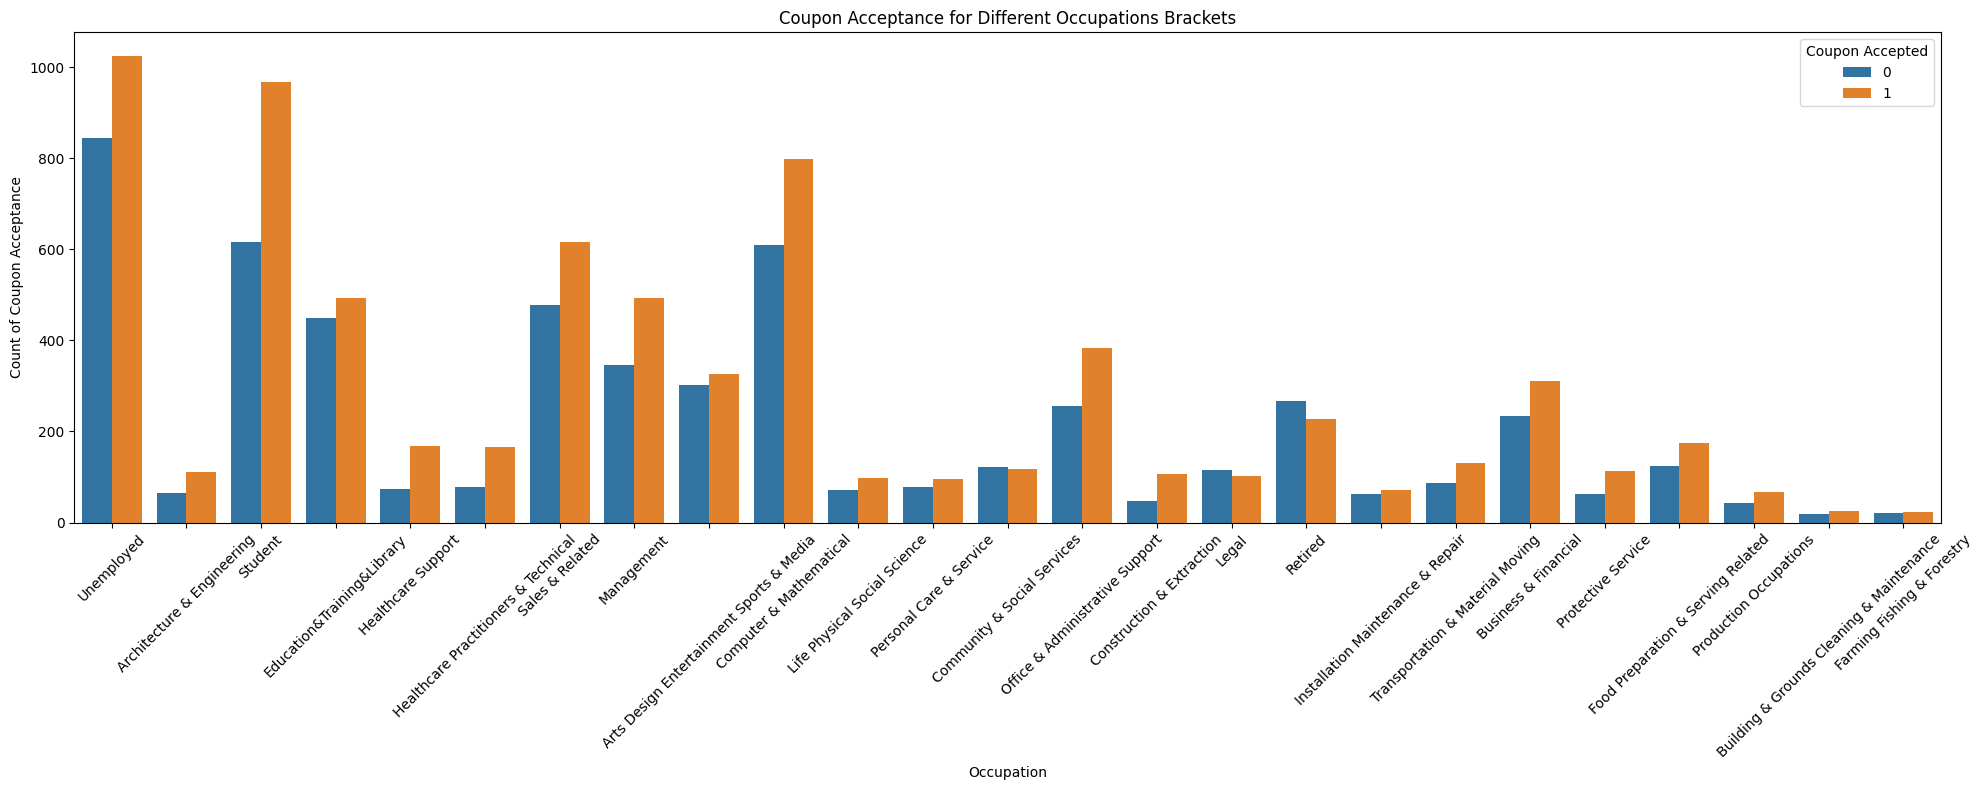

In [10]:
# choose a big figure for visibility
plt.figure(figsize=(20, 8))

sns.countplot(x='occupation', hue='Y', data=data)

plt.title('Coupon Acceptance for Different Occupations Brackets')
plt.xlabel('Occupation')
plt.ylabel('Count of Coupon Acceptance')

# rotate the x-axis for readability
plt.xticks(rotation=45)
plt.legend(title='Coupon Accepted', loc='upper right')
plt.tight_layout()
plt.show()

This is an interesting graph. By observation, we see that unemployment accept the most coupon. This intuitively makes sense because they don't earn a lot of money to taking any discount would save themm financially. Another cool observation would be between student and Architecture and Engineering, there is a wide imbalance between the two group acceptance rate. This intuitively makes sense also because student tends to make no mmoney and they would appreciate coupon to save some money.

Overall, what I observe is that most blue collar job accept less coupon. My guess is because they are less involve in the digital world where I believe to be the most marketing. White collar jobs tend to involve more around the media and tech in general, therefore, they are mmore expose to digital advertisement.

2. What about income, does it affect the acceptance rate?

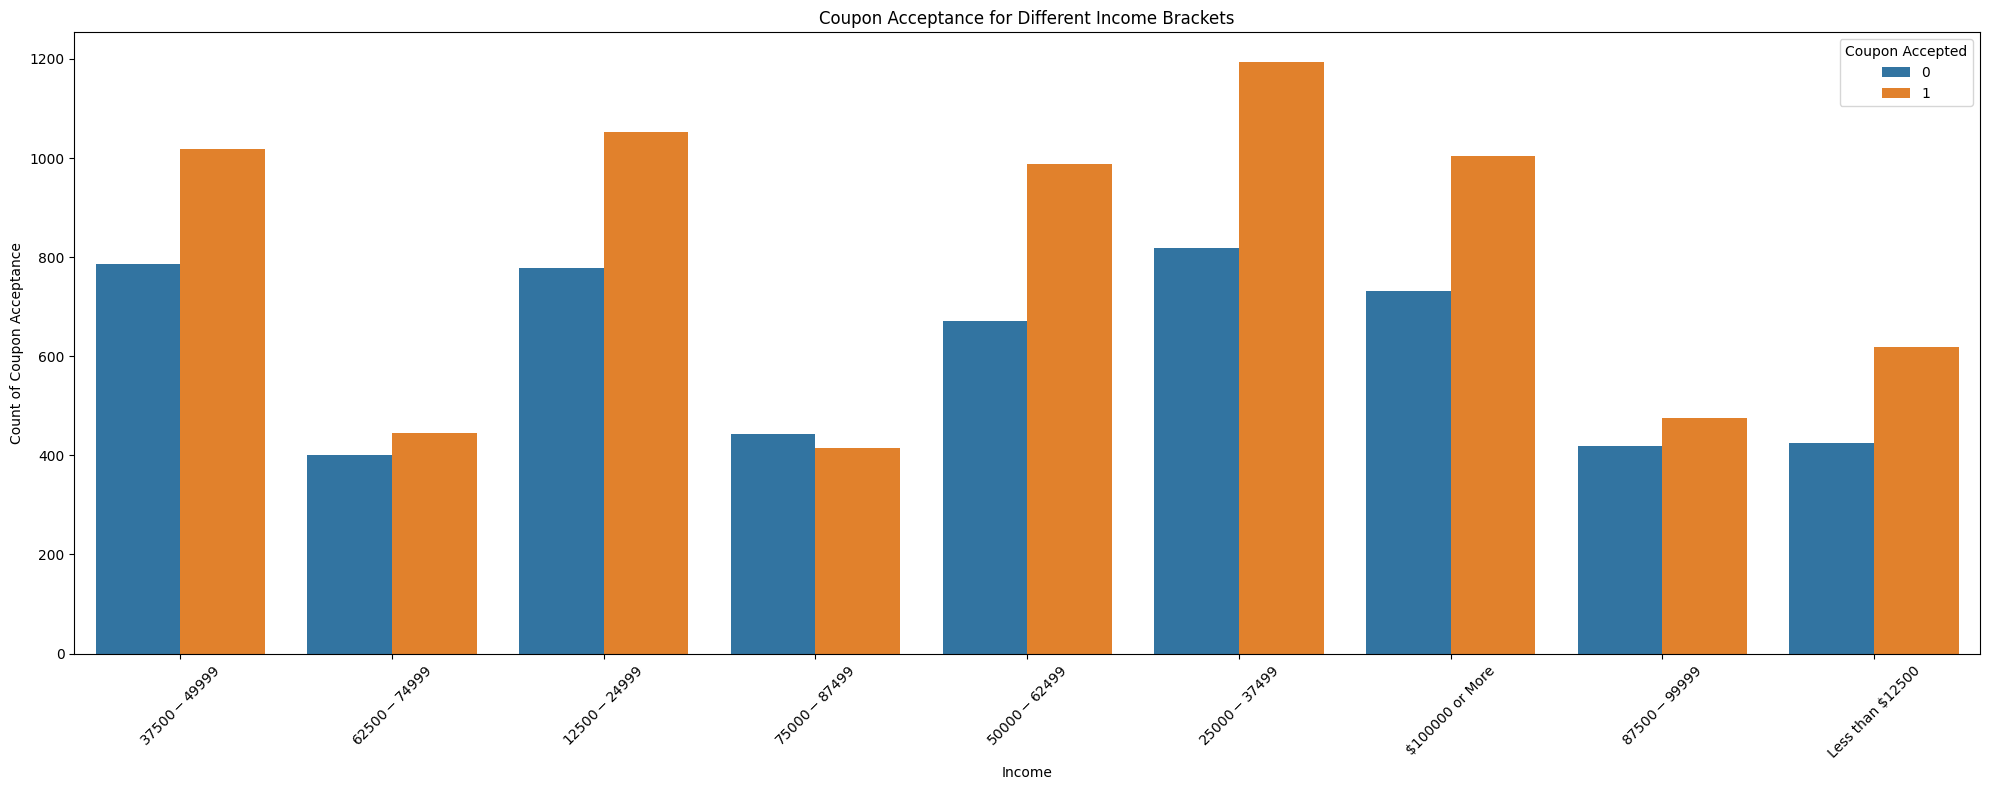

In [168]:
# choose a big figure for visibility
plt.figure(figsize=(20, 8))

sns.countplot(x='income', hue='Y', data=data)

plt.title('Coupon Acceptance for Different Income Brackets')
plt.xlabel('Income')
plt.ylabel('Count of Coupon Acceptance')

# rotate the x-axis for readability
plt.xticks(rotation=45)
plt.legend(title='Coupon Accepted', loc='upper right')  #
plt.tight_layout()
plt.show()

In this graph, we observe that people who are making less money tend to has high rate of acceptance. Again, this prove our hypothesis that being low income will take high chance to accept coupon for discount and save some money.

Though, if you notice, people who make a lot of money (more than 100k), tend to have a 'YOLO' acceptance rate because they want to save even more money. They probably just laying around and not worry about money therefore have time to accept coupon at the bar.

4. What about age, what is the behavior of age affecting on coupon acceptance rate?

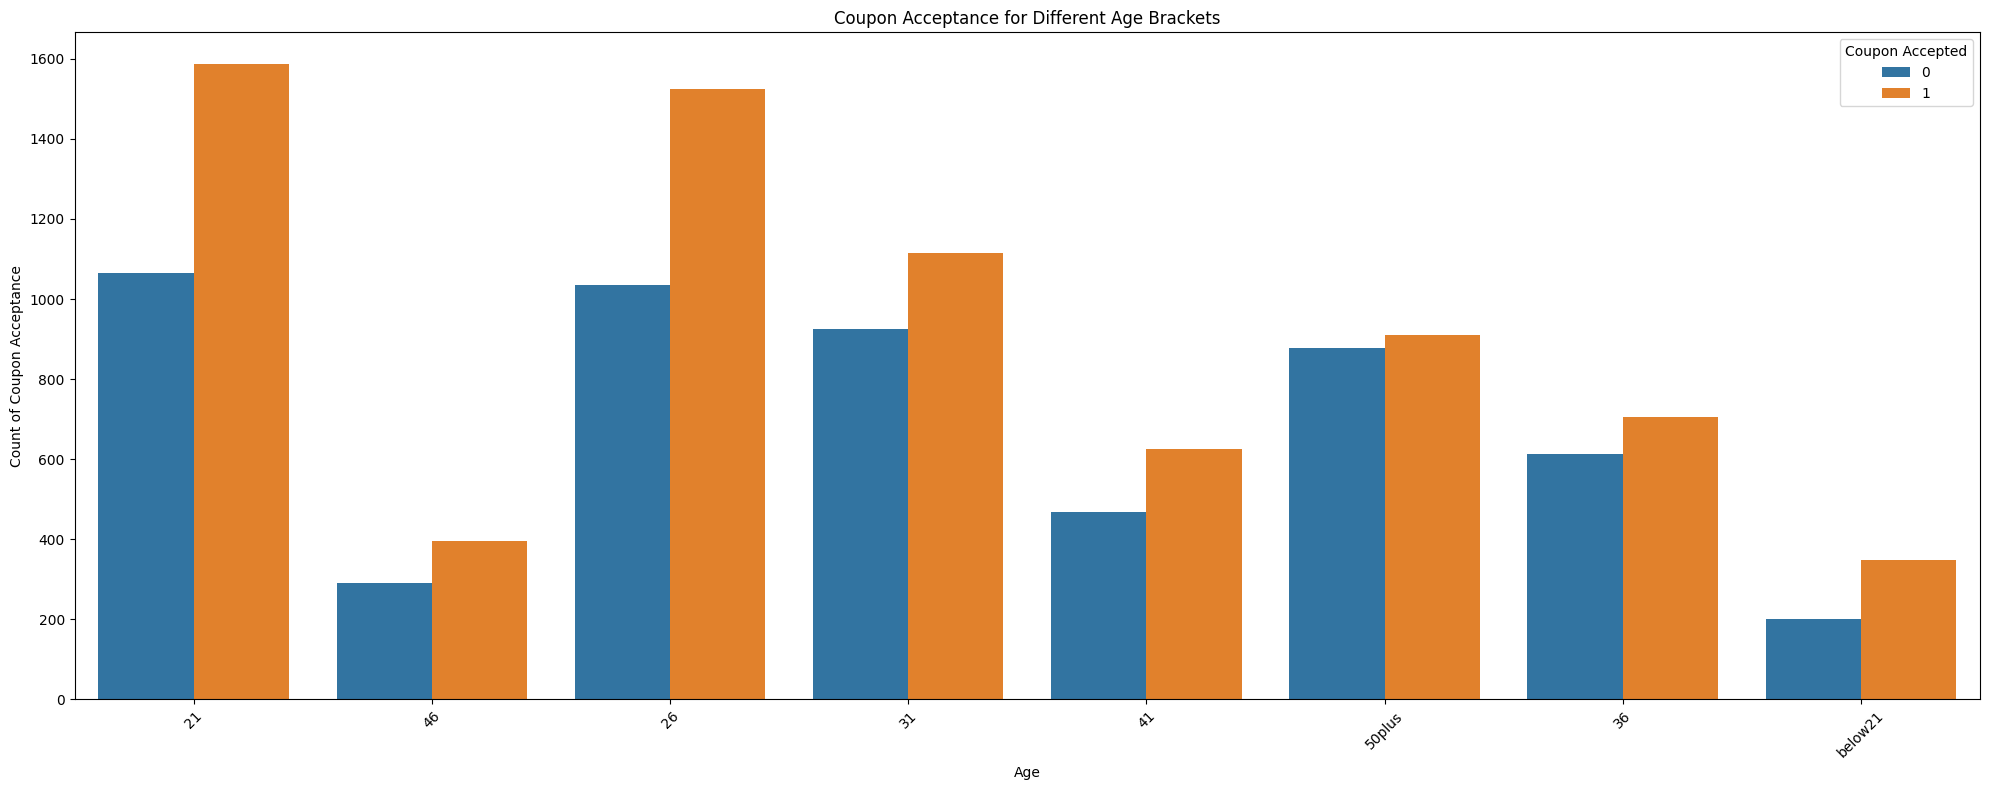

In [166]:
# choose a big figure for visibility
plt.figure(figsize=(20, 8))

sns.countplot(x='age', hue='Y', data=data)

plt.title('Coupon Acceptance for Different Age Brackets')
plt.xlabel('Age')
plt.ylabel('Count of Coupon Acceptance')

# rotate the x-axis for readability
plt.xticks(rotation=45)
plt.legend(title='Coupon Accepted', loc='upper right')
plt.tight_layout()
plt.show()

This graph solify our hypothesis earlier given that young individuals tend to accept more coupon due to being either poor or super rich, regardless young people either extreme measure with higer rate of acceptance.

One other point is that it is very low rate with age below 21 because of legal factor.

5. What is the average acceptance and its count within a certain group of occupation and income?

In [160]:
# find the average and the frequency of acceptance rate given groupy of occupation and income
acceptance_rateCounts_by_group = data.groupby(['occupation', 'income', 'age'])['Y'].agg(['mean', 'count']).reset_index()

# rename the columns
acceptance_rateCounts_by_group.rename(columns={'mean': 'Acceptance_Rate', 'count': 'Total_Count'}, inplace=True)

# sort the value in descending values
sorted_group = acceptance_rateCounts_by_group.sort_values(by='Acceptance_Rate', ascending=False)


In [163]:
fig = px.bar(
    sorted_group,
    x='age',
    y='Acceptance_Rate',
    color='income',
    title='Coupon Acceptance Rate by Occupation and Annual Income',
    labels={'Acceptance_Rate': 'Acceptance Rate', 'age': 'Age', 'annual_income': 'Annual Income'}
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Acceptance Rate',
    legend_title='Annual Income',
    xaxis_tickangle=-45,  # Rotate the x-axis labels
    barmode='group',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=1.01
    ),
    autosize=False,
    width=2500,
    height=1000
)


fig.show()

This graph is a combination group by, finding the average acceptance rate and count of each group (occupation, income, and age). What I noticed is that low income really enjoy bar life and having higher count of accepting coupon. Though, individual makes less thatn 12,500 are most likely those who are underage therefore have lower rate of acceptance due to no prevalance at the bar life.

6. Let's observe the frequency of acceptance based on the frequency of dinning out between cheap and more fine dinning restaurant.

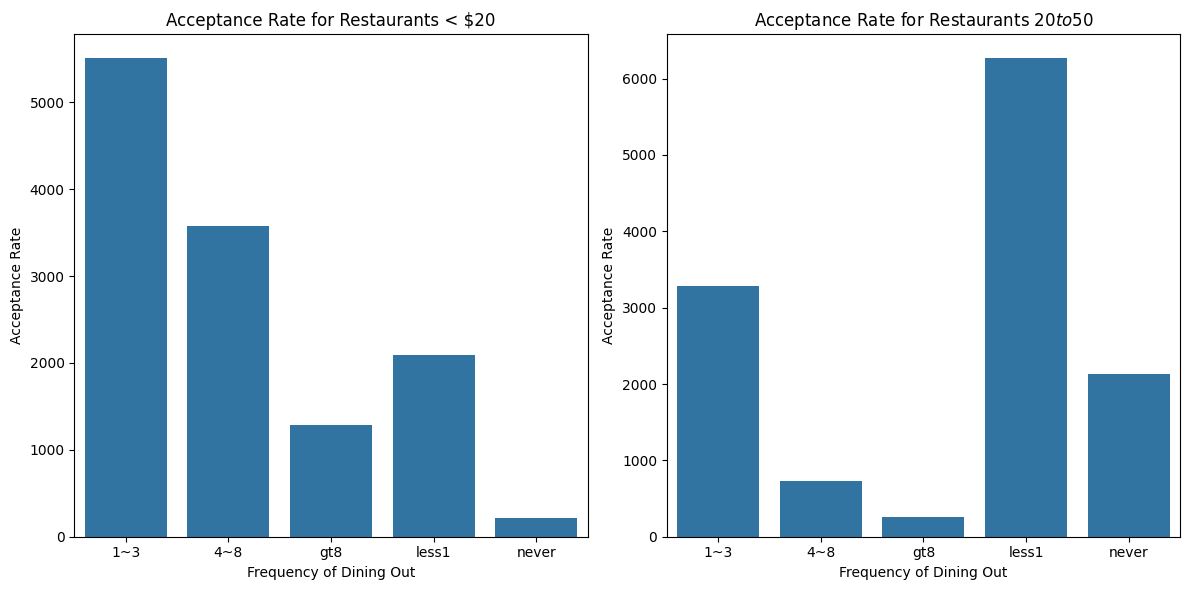

In [126]:
data['Accepted'] = data['Y'] == '1'
acceptance_rate_less_than_20 = data.groupby('RestaurantLessThan20')['Accepted'].count().reset_index()

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='RestaurantLessThan20', y='Accepted', data=acceptance_rate_less_than_20)
plt.title('Acceptance Rate for Restaurants < $20')
plt.xlabel('Frequency of Dining Out')
plt.ylabel('Acceptance Rate')

acceptance_rate_20_to_50 = data.groupby('Restaurant20To50')['Accepted'].count().reset_index()

plt.subplot(1, 2, 2)
sns.barplot(x='Restaurant20To50', y='Accepted', data=acceptance_rate_20_to_50)
plt.title('Acceptance Rate for Restaurants $20 to $50')
plt.xlabel('Frequency of Dining Out')
plt.ylabel('Acceptance Rate')

# automatic function to layout the subplot for easier visibility
plt.tight_layout()
plt.show()

For both restuarants, we observe that either cheap or more expensive restuarants, driver will go out less (1~3, 4~8, and less1), this indicates that drivers are lower income. This solidify the hypothesis that lower income individuals tend to accept coupon for discount and save more money.

7. Now, let's observe the relationship between variable using scatter plot and observe its correlation

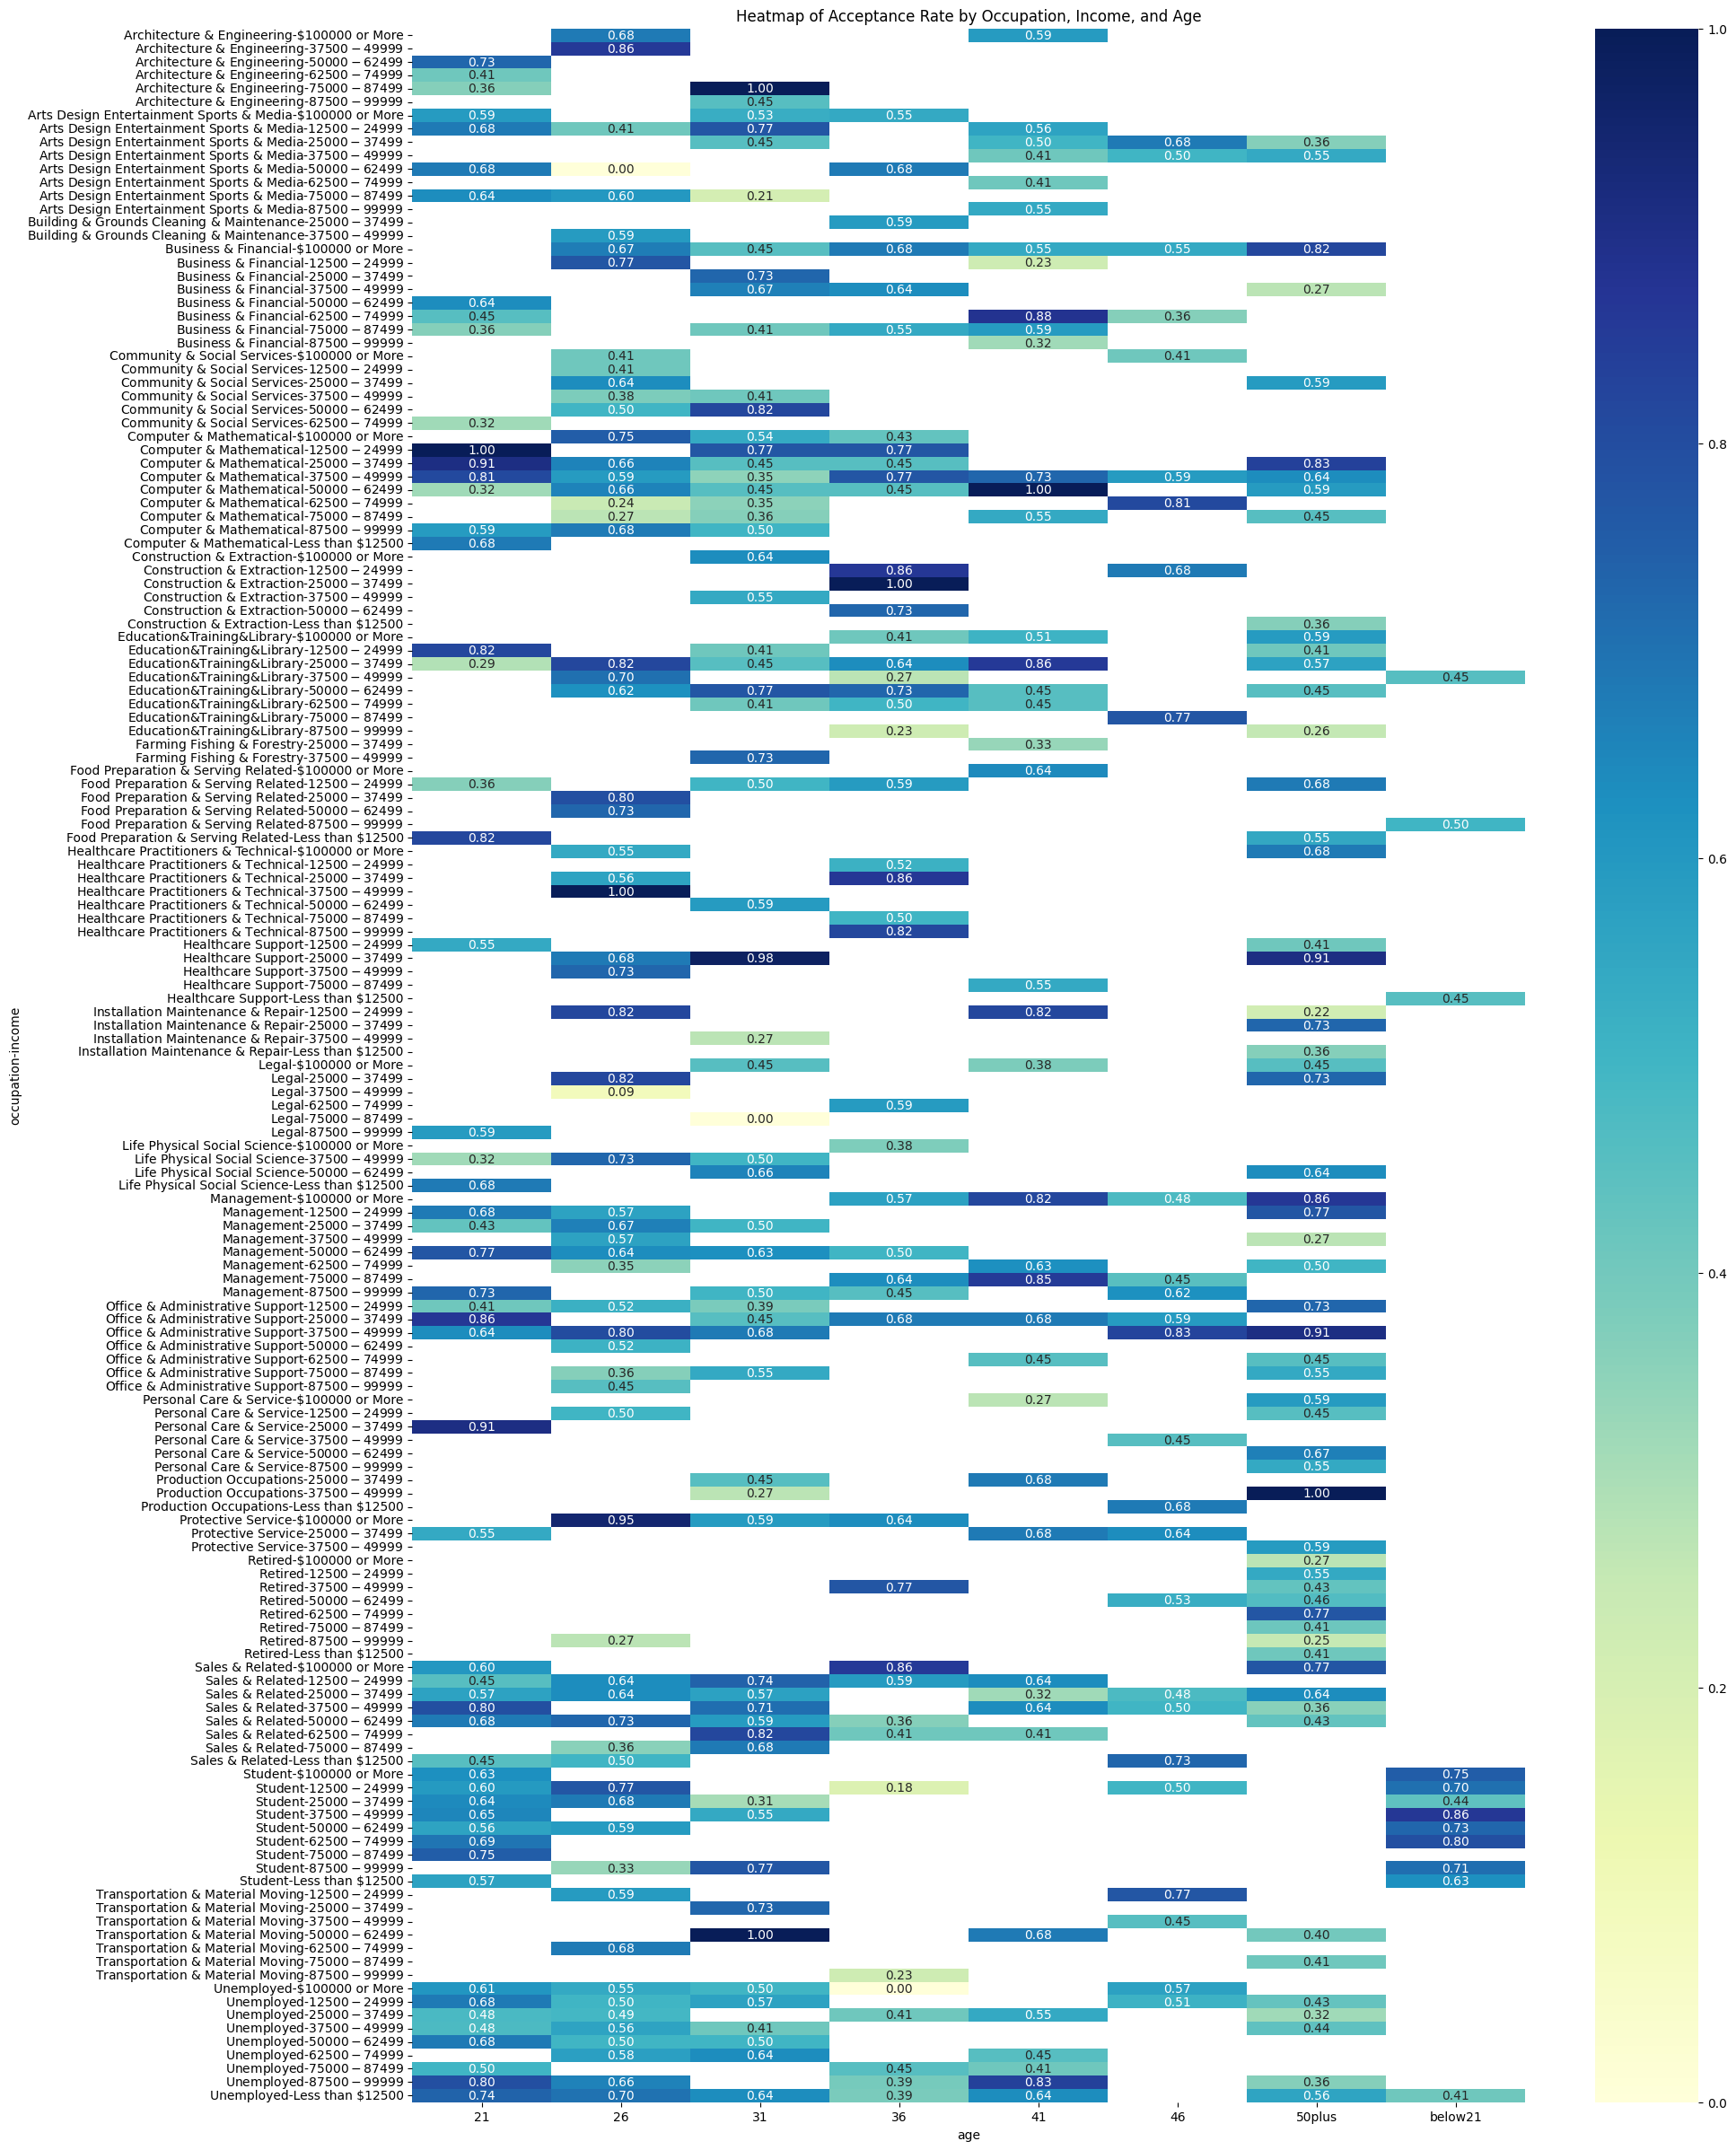

In [20]:

# Group by 'occupation', 'income', and 'age', then calculate the mean and count of 'Y'
acceptance_rateCounts_by_group = data.groupby(['occupation', 'income', 'age'])['Y'].agg(['mean', 'size']).reset_index()

# Rename the columns
acceptance_rateCounts_by_group.rename(columns={'mean': 'Acceptance_Rate', 'size': 'Total_Count'}, inplace=True)

# Sort the values in descending order by 'Acceptance_Rate'
sorted_group = acceptance_rateCounts_by_group.sort_values(by='Acceptance_Rate', ascending=False)

# pivot the table for the heatmap
pivot_table = sorted_group.pivot_table(index=['occupation', 'income'], columns='age', values='Acceptance_Rate')

# Plotting the heatmap
plt.figure(figsize=(20, 30))
heatmap = sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap of Acceptance Rate by Occupation, Income, and Age')
plt.show()

This heatmap tells us a lot of about the difference in occupation, income and age between those who accept coupons and those do not.

For income, I noticed that some high income possessed both high and low acceptance rates. Income alone then would not determine whether drivers would accept coupons or not, that occupation and age would take into consideration.

Through observation, I can tell you that occupation like Management, Computer & Mathematical, and Health Practitioners with a certain income level have a higher chance of accepting due to lifestyle.

In comparison to jobs like Production, Food Preparation & Serving, or Building & Grounds Cleaning & Maintenance show a higher variance in accepting coupon.

These two example well explained the nature of occupation's environment and lifestyle where it would lead on inclined toward accepting coupons.

However, to say a definitive conclusion through visualization on the interplay between occupations, income, and age on acceptance rate is complex. Again, the impact of these variables on acceptance rate rather be an interdependent relationship. For example, young people in tech would have higher chance accepting digital coupons.


**Investigating the Coffee Coupons**

The independent investigation above is quite general data analysis and visualization of many aspect that contribute to the differences between drivers' who accept and who's not.

Now, we will lead you through an exploration of just the Coffee related coupons.  

1. Create a new `DataFrame` that contains just the Coffee coupons.
2. What proportion of Coffee House coupons were accepted?
3. Compare the acceptance rate between those who went to a Coffee House 3 or fewer times a month to those who went more.
4. Compare the acceptance rate between drivers who go to a Coffee House more than once a month and are over the age of 25 to the all others.  Is there a difference?
5. Use the same process to compare the acceptance rate between drivers who go to Coffee House more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
6. Compare the acceptance rates between those drivers who:

- go to Coffee House more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to Coffee House more than once a month and are under the age of 30 *OR*
- go to expensive restaurants more than 4 times a month and income is less than 50K.





In [37]:
bar_coupon_data = data[data['coupon'] == 'Coffee House'][['coupon']]
print(f"The proportion of Coffee House coupons were accepted is {round(data[data['coupon'] == 'Coffee House'][['coupon', 'Y']].mean(numeric_only=True)[0], 2) * 100}%")

print(f"The acceptance rate between those who went to a Coffee House 3 or fewer times a month: {round(data[data['CoffeeHouse'] == '1~3']['Y'].mean(numeric_only=True), 3) * 100}% to those who went more: {round(data[data['CoffeeHouse'].isin(['4~8', 'gt8'])]['Y'].mean(numeric_only=True), 3) * 100}%")

print(f"The difference between acceptance rate between drivers who go to Coffee House more than once a month and are over 25: {round(data[data['CoffeeHouse'].isin(['1~3', '4~8', 'gt8']) & (data['age'].isin(['46', '26', '31', '41', '50plus']))]['Y'].mean(numeric_only=True), 3) * 100}% \
compare to driver who are 25 and go than less than a month: {round(data[data['CoffeeHouse'].isin(['never', 'less1']) & (data['age'].isin(['46', '26', '31', '41', '50plus']))]['Y'].mean(numeric_only=True), 3) * 100}%")

more_than_once_coffee = data[
    data['CoffeeHouse'].isin(['1~3', '4~8', 'gt8']) &
    data['passanger'].isin(['Alone', 'Friend(s)', 'Partner']) &
    ~data['occupation'].isin(['Farming', 'Fishing', 'Forestry'])
]['Y'].mean(numeric_only=True)

less_than_once_coffee = data[
    data['CoffeeHouse'].isin(['less1', 'never']) &
    data['passanger'].isin(['Alone', 'Friend(s)', 'Partner']) &
    ~data['occupation'].isin(['Farming', 'Fishing', 'Forestry'])
]['Y'].mean(numeric_only=True)

print(f'The acceptance rate between drivers who go to Coffee House more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {round(more_than_once_coffee, 3) * 100}% compare to those who goes less than 1 or never: {round(less_than_once_coffee, 3) * 100}%')

driver_group1_coffee = data[
    (data['CoffeeHouse'].isin(['1~3', '4~8', 'gt8']) & ~data['passanger'].isin(['Kids']) & ~data['maritalStatus'].isin([['Widowed']]))
    ]['Y'].mean()
driver_group2_coffee = data[
    (~data['CoffeeHouse'].isin(['never', 'less1']) & ~data['age'].isin(['50plus', '46', '41', '36']))
    ]['Y'].mean()
driver_group3_coffee = data[
    (data['Restaurant20To50'].isin(['4~8', 'gt8']) & data['income'].isin(['$37500 - $49999']))
    ]['Y'].mean()

print(f"The acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {round(driver_group1_coffee, 3) * 100}% OR \n \
The acceptance rate of drivers who go to bars more than once a month and are under the age of 30: {round(driver_group2_coffee, 3) * 100}% OR \n \
The acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {round(driver_group3_coffee, 3) * 100}%")


The proportion of Coffee House coupons were accepted is 50.0%
The acceptance rate between those who went to a Coffee House 3 or fewer times a month: 65.4% to those who went more: 61.4%
The difference between acceptance rate between drivers who go to Coffee House more than once a month and are over 25: 62.8% compare to driver who are 25 and go than less than a month: 50.1%
The acceptance rate between drivers who go to Coffee House more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 64.2% compare to those who goes less than 1 or never: 51.1%
The acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 63.5% OR 
 The acceptance rate of drivers who go to bars more than once a month and are under the age of 30: 64.9% OR 
 The acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 73.3%


With these result, this even confirm the pattern further of how income, age, and occupation or even martial status really differentiate that those accept coupon and those who's not on a features level or I would say lifestyle given their demographic. Funnily, if you see those who make low income who then goes to fancy restuarant tend to accept coupon at a whopping high rate because they expect to get discount the next time they go there to save some money.

# Conclusion
- The data analysis and visualization of probability distribution a clear difference between driver who accepts and those do not accept coupons.Certain factors in combination like, job type, age range, and yearly income, working interdepently appear to influence how people decide to rate of people accepting coupon. We observed that customers from particular professional backgrounds and financial standings tend to accept coupons at a higher rate. Most importantly, acceptance rates varies accross age groups, suggesting me that it is a crucial factor in drivers' decision to accept coupon.

- Given these observation, this would craft an effective marketing strategies that appear in the data. For example, younger customer between 21 and 26, as well as those earn either really low, below 12,500 and those who earns extremely high, above 100,000 annually, are more receptive to coupon offers. I am not sure if this is a result of effect marketing or just the nature of variables but this for sure implying an establishment and implementation of a market stratigies to capitalize the profit from those two groups as an example.

- In short, I believe with these understanding of the probability distributions that underpin these trends could be crucial in creating predictive models for future coupon distribution strategies, leading to more strategic marketing investments and better outcomes.